# Part I
## Exercise 1

In [15]:
import numpy as np
x = [[0.7,-0.3], [0.4, 0.5], [-0.2,0.8], [-0.4, 0.3]]
c = [[0,0], [1,-1], [-1, 1]]
final = [[1,0,0,0], [1,0,0,0], [1,0,0,0], [1,0,0,0]]
z = [0.8, 0.6, 0.3, 0.3]

for i in range(4):
    for j in range(3):
        final[i][j+1] = np.exp(-((c[j][0]-x[i][0])**2 + (c[j][1]-x[i][1])**2)/2)

f = np.matrix(final)
id = np.identity(4)*0.1
ft = np.transpose(f) 
w = np.dot(np.dot(np.linalg.pinv(np.dot(ft, f) + id), ft), z)
t = np.dot(f, np.transpose(w))
rmse = 0
for i in range(4):
    rmse += (z[i] - t[i][0])**2
rmse /= 4
rmse = np.sqrt(rmse)
print("W:", w)
print("RMSE:", rmse)


W: [[ 0.33914267  0.19945264  0.40096085 -0.29599936]]
RMSE: [[0.06508238]]


# Part II
## Exercise 1

/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


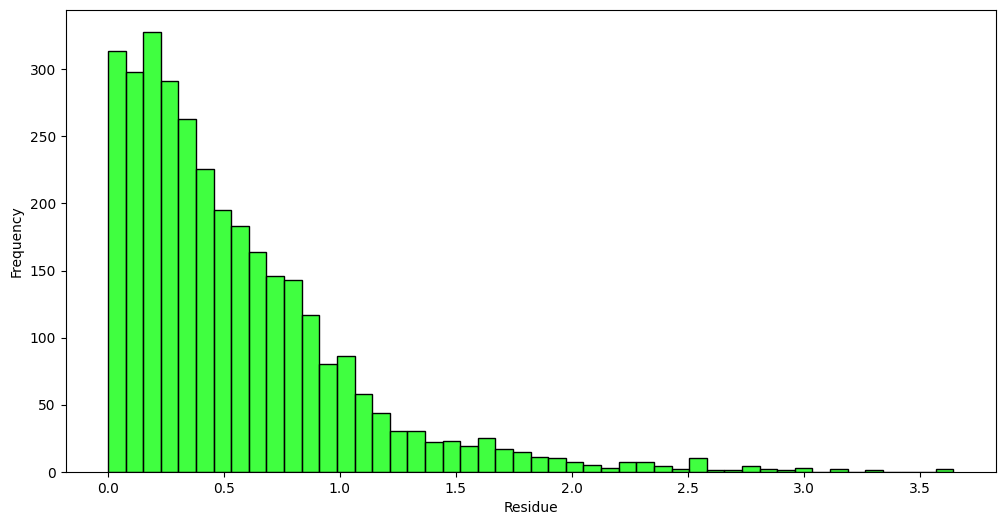

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)
data = pd.read_csv("winequality-red.csv", sep=";")
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

predictions = []
residue_list = []
MAE = []
RMSE = []

for seed in range(1, 11):
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=seed, early_stopping=True, validation_fraction=0.2)
    mlp.fit(X_train, y_train)
    pred = mlp.predict(X_test)
    predictions.append(pred)
    residue = pred - y_test
    residue_list.append(np.abs(residue))
    MAE.append(metrics.mean_absolute_error(y_test, pred))
    RMSE.append(metrics.mean_squared_error(y_test, pred, squared=False))

residues = np.array(residue_list).flatten()
plt.figure(figsize=(12, 6))
sns.histplot(data=residues, color="lime")
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.show()

## Exercise 2

In [7]:
def bound(x):
    rounded_x = round(x)
    if rounded_x < 0:
        return 0
    elif rounded_x > 10:
        return 10
    return rounded_x


bounded_MAE = []
for pred in predictions:
    new_pred = []
    for value in pred:
        new_pred.append(bound(value))
    bounded_MAE.append(metrics.mean_absolute_error(y_test, new_pred))

print("Mean of Bounded MAE's:", np.mean(bounded_MAE), "\nMean of Normal MAE's", np.mean(MAE))

Mean of Bounded MAE's: 0.4928125 
Mean of Normal MAE's 0.5437511706983347


Since the mean absolute error is smaller than the one previously calculated with the unbounded estimates, we can conclude, that this technique does, indeed, help to get better results.

## Exercise 3

In [12]:
mini_batch = [20, 50, 100, 200]
RMSE_20 = []
RMSE_50 = []
RMSE_100 = []
RMSE_200 = []


for seed in range(1, 11):
    for n in mini_batch:
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=seed, max_iter=n, validation_fraction=0.2)
        mlp.fit(X_train, y_train)
        pred = mlp.predict(X_test)
        if n == 20:
            RMSE_20.append(metrics.mean_squared_error(y_test, pred, squared=False))
        elif n == 50:
            RMSE_50.append(metrics.mean_squared_error(y_test, pred, squared=False))
        elif n == 100:
            RMSE_100.append(metrics.mean_squared_error(y_test, pred, squared=False))
        else:
            RMSE_200.append(metrics.mean_squared_error(y_test, pred, squared=False))

print("Early Stopping RMSE:", np.mean(RMSE))
print("RMSE 20:            ", np.mean(RMSE_20))
print("RMSE 50:            ", np.mean(RMSE_50))
print("RMSE 100:           ", np.mean(RMSE_100))
print("RMSE 200:           ", np.mean(RMSE_200))


Early Stopping RMSE: 0.7285645002031444
RMSE 20:             1.5741537078556829
RMSE 50:             0.9296215581878042
RMSE 100:            0.7495674512113977
RMSE 200:            0.697002682560151


As we can see from the results, for a number of maximum iterations lower than 200, the root mean squared error is higher than the one calculated previously with an early stopping set to true. This means that the impact of such values for a max number of iterations is rather negative, since it means that the model is underfitted. On the other hand for a value of 200 the impact is good since the RMSE is lower.


## Exercise 4

By the results given in the last exercise, we can say that an early stop of the model's training, is overall good for the performance. None the less, we got better results by setting a well defined number of maximum iterations (200), this could happen because, the validation fraction does not represent the testing sample very well, meaning that the model's training will stop earlier than it would, if the validation sample was more similar to the testing sample.